<a href="https://colab.research.google.com/github/danM4y4G1tHub/RedesNeuronales-Python-ML/blob/main/Modelo_Red_Neuronal_Perseptron_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

In [4]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenheit = np.array([-40, 14, 32, 46, 59, 72 , 100], dtype=float)

In [22]:
#Se crea una capa densa que son las que todas las neuronas
# tienen conexiones entre si
#Parametro 1: Cantidad de neuronas por capa
#Parametro 2: Cantidad de neuronas de entrada
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

#Probando con capas ocultas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [23]:
# En el compilador le digo como quiero que procese las matematicas para
#trabajar mejor
#Parametro 1: optimizador (se usa Adam que le dice a al red como ajustar)
# los pesos de manera eficiente
  #Adam()
    #Parametro: tasa de aprendisaje, debe ser pequeño
#Parametro 2: funcion de perdida
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [25]:
print("Comenzando entrenamiento...")
#Para el entrenamiento de usa la funcion fit
#Parametro 1: Datos de entrada
#Parametro 2: Datos de salida
#Parametro 3: Cantidad de vueltas para entrenar
historial = modelo.fit(celsius, farenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento...
Modelo entrenado


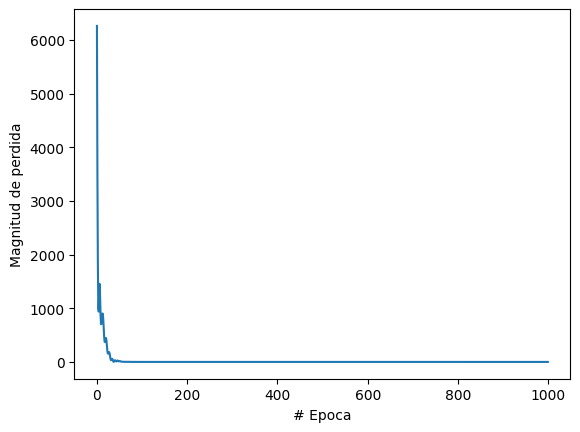

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [20]:
print("Hagamos predicción!")
resultado  = modelo.predict([100.0])
print("El resultado es " + str(resultado) + "farenheit")

Hagamos predicción!
1/1 [==============================] - 0s 104ms/step
El resultado es [[211.74045]]farenheit


In [27]:
#Para ver que datos de sesgo y pesos se guardaron al hacer la predicción
print("Variables internas del modelo")
#print(capa.get_weights())
#Parametros de salida en el arreglo
#Parametro 1: Peso
#Parametro 2: Sesgo

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.240174  ,  0.70828724, -0.19633967]], dtype=float32), array([-2.4274235,  3.5852594,  1.9151138], dtype=float32)]
[array([[ 0.7062168 ,  0.19182485, -0.47132832],
       [-1.3851942 ,  0.10823302,  1.40642   ],
       [-0.94965744,  0.06085374,  0.345903  ]], dtype=float32), array([-3.509169 , -2.588847 ,  3.3478248], dtype=float32)]
[array([[-1.0497199 ],
       [-0.47845986],
       [ 1.4659905 ]], dtype=float32), array([3.178646], dtype=float32)]
